In [1]:
from google.colab import drive
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import norm as gauss

#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 24})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
L = np.array([178, 205,320, 251, 276, 302,327])
largo = np.array([178, 205,230,251, 276, 302,327])
err_L = np.array([1]*len(L))


In [4]:
voltaje = []
error_voltaje = []
tiempo = []
error_tiempo = []


for i in L:
    #if i == len(L)-1:
    #    path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 10-9/laton/variando L/L={i}(bis).csv"
    if i == 178:
        path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 10-9/laton/variando L/L={i}.csv.csv"
    else:
        path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 10-9/laton/variando L/L={i}.csv"

    df= pd.read_csv(path, header=None, skiprows= 1)
    t = df[0]
    err_t = df[1]
    v = df[2]
    err_v = df[3]

    tiempo.append(t)
    voltaje.append(v)
    error_voltaje.append(err_v)
    error_tiempo.append(err_t)


#Señales

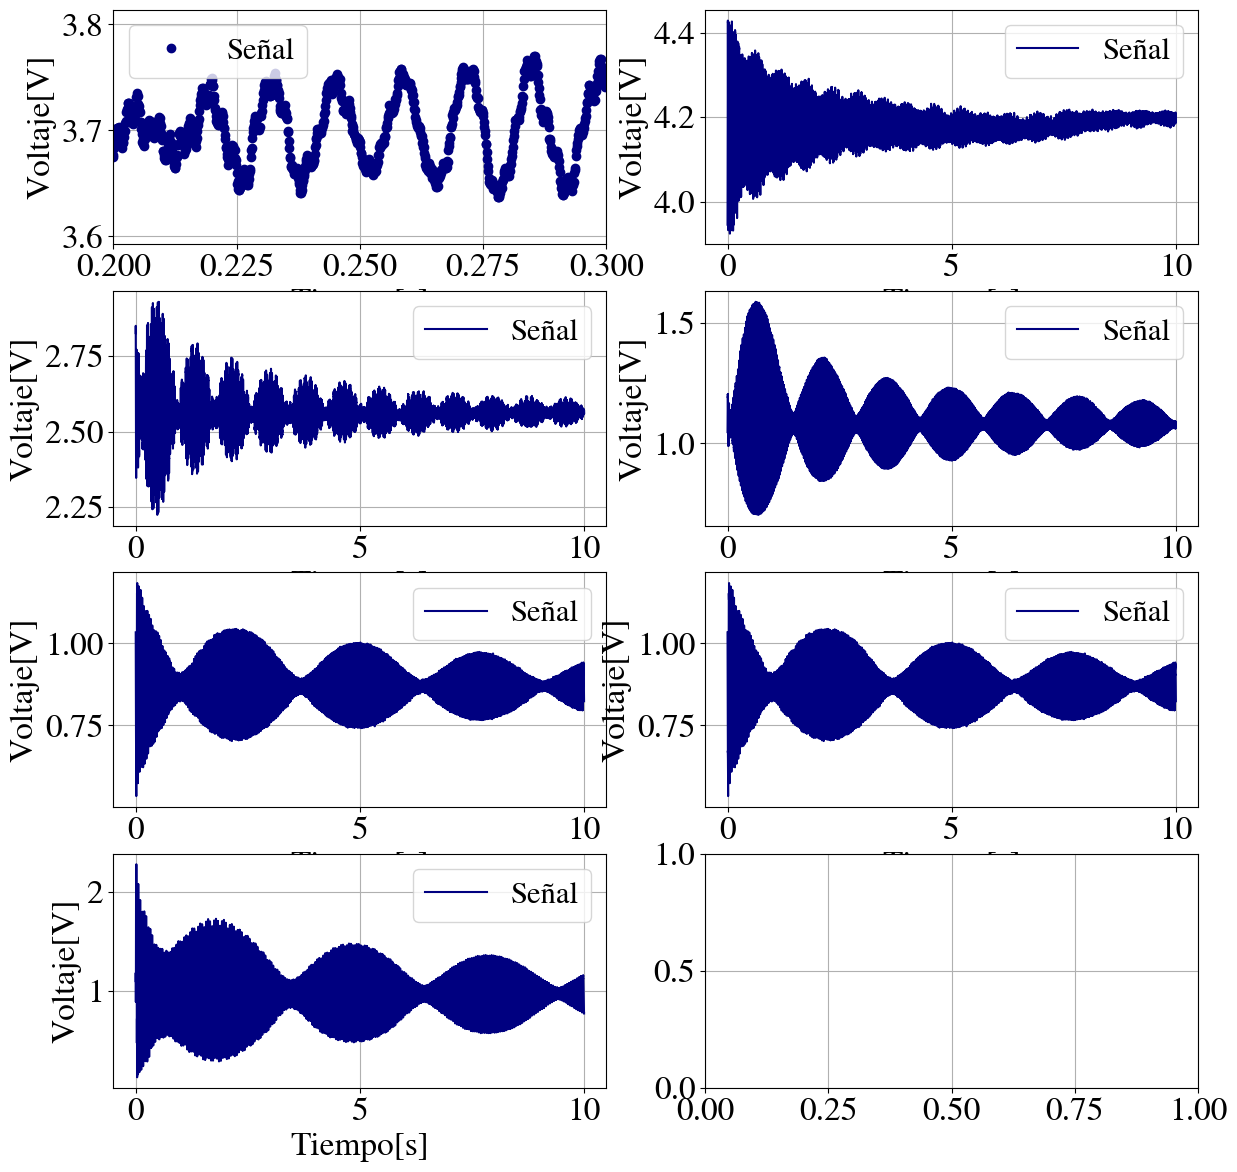

In [8]:
fig, axs = plt.subplots(4,2, figsize= (14,14))
axs[0,0].plot(tiempo[0], voltaje[0], color = 'navy', label = 'Señal', marker = 'o', linestyle = '')
#axs[0,0].errorbar(tiempo[0], voltaje[0], c = 'navy', label = 'Señal', fmt = 'o',yerr = error_voltaje[1], xerr = error_tiempo[1], capsize =8)
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlim(0.2,0.3)
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].legend()

axs[0,1].plot(tiempo[1], voltaje[1], color = 'navy', label = 'Señal')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
axs[0,1].legend()

axs[1,0].plot(tiempo[2], voltaje[2], color = 'navy', label = 'Señal')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
axs[1,0].legend()

axs[1,1].plot(tiempo[3], voltaje[3], color = 'navy', label = 'Señal')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
axs[1,1].legend()

axs[2,0].plot(tiempo[5], voltaje[5], color = 'navy', label = 'Señal')
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Tiempo[s]')
axs[2,0].legend()


axs[2,1].plot(tiempo[5], voltaje[5], color = 'navy', label = 'Señal')
axs[2,1].set_ylabel('Voltaje[V]')
axs[2,1].set_xlabel('Tiempo[s]')
axs[2,1].legend()

axs[3,0].plot(tiempo[6], voltaje[6], color = 'navy', label = 'Señal')
axs[3,0].set_ylabel('Voltaje[V]')
axs[3,0].set_xlabel('Tiempo[s]')
axs[3,0].legend()

plt.show()

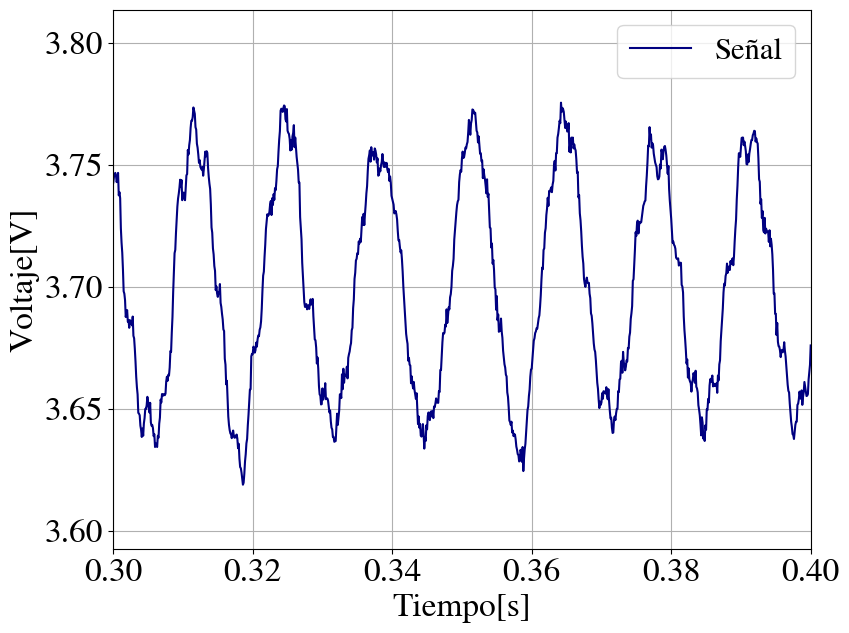

In [11]:
plt.plot(tiempo[0], voltaje[0], color = 'navy', label = 'Señal')
plt.ylabel('Voltaje[V]')
plt.xlim(0.3,0.4)
plt.xlabel('Tiempo[s]')
plt.legend()
plt.show()

#Decaimiento

In [ ]:
def exponencial_cos(x,f,a,b, c,d):
    return a*np.abs(np.cos(2*np.pi*f*(x-d))*np.exp((x-d)*b))+c

def exponencial_cos_neg(x,f,a,b, c,d):
    return -a*np.abs(np.cos(2*np.pi*f*(x-d)))*np.exp((x-d)*b)-c


def chi2_red(x, y, f_ajuste, err_y, params):
  n_datos = y.size
  n_params = len(params)
  residuos = y - f_ajuste(x, *params)
  nu =  (n_datos - n_params) #Grados de Libertad
  chi2_val = sum((residuos / err_y) ** 2)
  chi2_red = chi2_val/nu
  p_valor = chi2.sf(chi2_val, df = nu)
  return chi2_val, chi2_red, nu, p_valor

In [ ]:
maximos = []
minimos = []
t_maximos = []
t_minimos = []

err_max = []
err_min = []
err_t_max = []
err_t_min = []

coef_min = []
ampl_min = []
t_ini_min = []
ordenada_min = []
err_coef_min = []
moduladora_min = []
err_moduladora_min = []


coef_max = []
ampl_max = []
t_ini_max = []
ordenada_max = []
moduladora_max = []
err_coef_max = []
err_moduladora_max = []


chi2_red_min = []
chi2_red_max = []
p_valor_max = []
p_valor_min = []

res_max = []
res_min = []

t_rec = []
v_rec = []

for i in range(len(largo)):

    if i == 0 or i ==1:
        t_recortado = np.array(tiempo[i][10000:40000])
        v_recortado = np.array(voltaje[i][10000:40000])
        ultimo = 4
        if i ==0:
            d_max = 400
            d_min = 400
        elif i==1:
            d_max = 500
            d_min = 500

    else:
        t_recortado = np.array(tiempo[i][25000:])
        v_recortado = np.array(voltaje[i][25000:])
        ultimo = 10

        if i == 2:
            d_min = 700
            d_max = 700
        else:
            d_min = 200
            d_max = 200

    estable = (max(v_recortado)-min(v_recortado))/2+min(v_recortado)

    #maximos
    picos_voltaje, diccionario_voltaje = find_peaks(v_recortado, height = estable, distance = d_max)
    picos_voltaje_min, diccionario_voltaje_min = find_peaks(-v_recortado, height = -estable, distance = d_min)

    picos_voltaje_max = v_recortado[picos_voltaje]
    t_max = t_recortado[picos_voltaje]

    maximos.append(picos_voltaje_max)
    suave_max = np.linspace(t_max[0], ultimo, 5000)

    max_err = error_voltaje[i].iloc[picos_voltaje]
    t_max_err = error_tiempo[i].iloc[picos_voltaje]

    #minimos

    min_volt = v_recortado[picos_voltaje_min]
    t_min = t_recortado[picos_voltaje_min]

    minimos.append(min_volt)
    suave_min = np.linspace(t_min[0], ultimo, 5000)

    min_err = error_voltaje[i].iloc[picos_voltaje_min]
    t_min_err = error_tiempo[i].iloc[picos_voltaje_min]

    err_min.append(min_err)
    err_t_min.append(t_min_err)

    err_max.append(max_err)
    err_t_max.append(t_max_err)

    #Ajustes
    if i == 0:
        p_ini = [1, estable-min(v_recortado), -0.7, estable, t_max[0]]
        p_ini_min = [1, estable-min(v_recortado), -0.7, -estable, t_min[0]]

    elif i==1:
        p_ini = [0.7, estable-min(v_recortado), -0.8, estable, t_max[0]]
        p_ini_min = [1, estable-min(v_recortado), -0.5, -estable, t_min[0]]

    elif i == 2:
        p_ini = [0.3, estable-min(v_recortado), -1, estable, t_max[0]]
        p_ini_min = [0.3, estable-min(v_recortado), -1, -estable, t_min[0]]

    elif i ==3:
        p_ini = [0.3, estable-min(v_recortado), -1, estable, t_max[0]]
        p_ini_min = [0.3, estable-min(v_recortado), -0.7, -estable, t_min[0]]

    elif i ==4:
        p_ini = [0.2, estable-min(v_recortado), -0.7, estable, t_max[0]]
        p_ini_min = [0.2, estable-min(v_recortado), -0.7, -estable, t_min[0]]

    elif i==5:
        p_ini = [0.3, estable-min(v_recortado), -1, estable, t_max[0]]
        p_ini_min = [0.3, estable-min(v_recortado), -1, -estable, t_min[0]]

    elif i ==6:
        p_ini = [0.2, estable-min(v_recortado), -1, estable, t_max[0]]
        p_ini_min = [0.1, estable-min(v_recortado), -1, -estable, t_min[0]]

    popt, pcov = curve_fit(exponencial_cos, t_max, picos_voltaje_max, sigma = max_err, absolute_sigma = True, p0 =p_ini)
    frec, amplitud, alfa, offset, t0 = popt
    frec_err, amplitud_err, alfa_err, offset_err, t0_err = np.sqrt(np.diag(pcov))


    popt_min, pcov_min = curve_fit(exponencial_cos_neg, t_min, min_volt, sigma = min_err, absolute_sigma = True, p0 = p_ini_min)
    frec_min,amplitud_min, alfa_min, offset_min, t0_min = popt_min
    frec_min_err,amplitud_min_err, alfa_min_err, offset_min_err, t0_min_err = np.sqrt(np.diag(pcov_min))

    #appendeo los parámetros
    coef_min.append(alfa_min)
    ampl_min.append(amplitud_min)
    moduladora_min.append(frec_min)
    err_moduladora_min.append(frec_min_err)
    err_coef_min.append(alfa_min_err)
    t_ini_min.append(t0_min)
    ordenada_min.append(offset_min)
    t_minimos.append(t_min)
    t_rec.append(t_recortado)
    v_rec.append(v_recortado)

    coef_max.append(alfa)
    ampl_max.append(amplitud)
    moduladora_max.append(frec)
    err_moduladora_max.append(frec_err)
    err_coef_max.append(alfa_err)
    t_ini_max.append(t0)
    ordenada_max.append(offset)
    t_maximos.append(t_max)


    #calculo parámetros de bondad y appendeo
    chi_min, chi_red_min, gl_min, p_value_min = chi2_red(t_min, min_volt, exponencial_cos_neg, min_err, popt_min)
    chi_max, chi_red_max, gl_max, p_value_max = chi2_red(t_max, picos_voltaje_max, exponencial_cos, max_err, popt)

    chi2_red_min.append(chi_red_min)
    chi2_red_max.append(chi_red_max)

    p_valor_min.append(p_value_min)
    p_valor_max.append(p_value_max)

    #ploteo
    plt.plot(t_recortado, v_recortado, label = 'Señal', color = 'teal', alpha = 0.5)
    plt.plot(t_min,min_volt, marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
    plt.plot(suave_min, exponencial_cos_neg(suave_min,frec_min,amplitud_min, alfa_min, offset_min, t0_min), label = 'Ajuste Minimos', color = 'navy')
    plt.plot(suave_max, exponencial_cos(suave_max,frec, amplitud, alfa, offset, t0), label = 'Ajuste Maximos', color = 'red')
    plt.plot(t_max,picos_voltaje_max, marker = 'o', linestyle = '', color = 'gray', alpha = 0.5)
    plt.xlabel('Tiempo[s]')
    plt.ylabel('Voltaje[V]')
    plt.legend(fontsize = '15')
    plt.show()

    #grafico de residuos

    residuos_max = picos_voltaje_max-exponencial_cos(t_max, *popt)
    residuos_min = min_volt - exponencial_cos_neg(t_min, *popt_min)

    res_max.append(residuos_max)
    res_min.append(residuos_min)

    plt.errorbar(t_max, residuos_max, label = 'Residuos máximos', yerr = max_err, xerr = t_max_err, fmt='.')
    plt.axhline(y=0, color = 'gray')
    plt.legend()
    plt.show()

    plt.errorbar(t_min, residuos_min, label = 'Residuos máximos', yerr = min_err, xerr = t_min_err, fmt = '.')
    plt.axhline(y=0, color = 'gray')
    plt.legend()
    plt.show()



In [ ]:
fig = plt.figure(figsize=(13, 7))  # tamaño de la figura

# Definir la grilla: 2 filas x 2 columnas
gs = fig.add_gridspec(2, 2, width_ratios=[1.5, 1])

# Subplot grande a la izquierda (ocupa las dos filas de la primera columna)
ax_left = fig.add_subplot(gs[:, 0])
ax_left.plot(t_rec[3], v_rec[3], label = 'Señal', color = 'teal', alpha = 0.5)
ax_left.plot(t_minimos[3],minimos[3], marker = 'o', linestyle = '', color = 'black', alpha = 0.5)
ax_left.plot(suave_min, exponencial_cos_neg(suave_min,moduladora_min[3],ampl_min[3], coef_min[3], ordenada_min[3], t_ini_min[3]), label = 'Ajuste Minimos', color = 'navy')
ax_left.plot(suave_max, exponencial_cos(suave_max,moduladora_max[3],ampl_max[3], coef_max[3], ordenada_max[3], t_ini_max[3]), label = 'Ajuste Maximos', color = 'red')
ax_left.plot(t_maximos[3],maximos[3], marker = 'o', linestyle = '', color = 'gray', alpha = 0.5)
ax_left.set_xlabel('Tiempo[s]',fontsize = '27')
ax_left.set_ylabel('Voltaje[V]',fontsize = '27')
ax_left.legend(fontsize = '19')


# Arriba a la derecha
ax_top_right = fig.add_subplot(gs[0, 1])

ax_top_right.errorbar(t_maximos[3], res_max[3], label = 'Residuos máximos', yerr = err_max[3], xerr = err_t_max[3], fmt='.')
ax_top_right.axhline(y=0, color = 'gray')
ax_top_right.legend(fontsize = '20')

# Abajo a la derecha
ax_bottom_right = fig.add_subplot(gs[1, 1], sharex=ax_top_right)
ax_bottom_right.errorbar(t_minimos[3], res_min[3], label = 'Residuos mínimos', yerr = err_min[3], xerr = err_t_min[3], fmt='.')
ax_bottom_right.axhline(y=0, color = 'gray')
ax_bottom_right.set_xlabel('Tiempo[s]',fontsize = '27')
ax_bottom_right.legend(fontsize = '20')

plt.tight_layout()
plt.show()

In [ ]:
#Parámetros de bondad


for i in range(len(largo)):
    print(f'Para la medición {i} de los máximos se obtuvo un chi cuadrado reducido de {chi2_red_max[i]}')
    print(f'Asociado a pvalue de  {p_valor_max[i]}')
    print(f'Para la medición {i} de los mínimos se obtuvo un chi cuadrado reducido de {chi2_red_min[i]}')
    print(f'Asociado a pvalue de  {p_valor_min[i]}')
    print(f'--------------------------------------------------------------------------')


In [ ]:
#decaimiento
for i in range(len(largo)):
    if i ==1:
        print(f'Yo este decaimiento lo tiraría, no logré ajustarlo mejor')
    print(f'Para la medición {i} de los máximos se obtuvo un decaimiento de ({coef_max[i]:.4f}+- {err_coef_max[i]:.4f})1/s')
    print(f'Asociado a una moduladora de ({moduladora_max[i]:.4f}+- {err_moduladora_max[i]:.4f})Hz')
    print(f'Para la medición {i} de los mínimos se obtuvo un decaimiento de ({coef_min[i]:.4f}+- {err_coef_min[i]:.4f})1/s')
    print(f'Asociado a una moduladora de ({moduladora_min[i]:.4f}+- {err_moduladora_min[i]:.4f})Hz')
    print(f'--------------------------------------------------------------------------')

## Viendo relaciones curiosas

In [ ]:
#Veo si puedo sacar alguna relación
fig, axs = plt.subplots(2,1, figsize = (9,7), sharex = True)

axs[0].errorbar(largo, moduladora_max, fmt = 'o', label = 'Máximos', yerr = err_moduladora_max, c = 'teal', capsize = 5)
axs[0].errorbar(largo, np.abs(moduladora_min), fmt = 'o', label = 'Mínimos', yerr = err_moduladora_min, c = 'crimson', capsize = 5)
axs[0].set_yticks((0.5, 1, 1.5))
axs[0].set_ylabel('Moduladora [Hz]')
axs[0].legend()

axs[1].errorbar(np.delete(largo,1), np.abs(np.delete(coef_max,1)), fmt = 'o', label = 'Máximos', yerr = np.delete(err_coef_max,1), c = 'teal', capsize = 5)
axs[1].errorbar(np.delete(largo,1), np.abs(np.delete(coef_min,1)), fmt = 'o', label = 'Mínimos', yerr = np.delete(err_coef_max,1), c = 'crimson', capsize = 5)
axs[1].set_xlabel('Largo de la barra [mm]')
axs[1].set_xticks(largo)
axs[1].set_yticks((0.1,0.2,0.3,0.4))
axs[1].set_ylabel('Decaimiento [1/s]')
axs[1].legend()


plt.show()

#FFT

In [ ]:
#calculo las tranformadas

t_final = 10
frec_muestreo = 10000
N = t_final*frec_muestreo


# Calular el vector de frecuencias.
frec = np.arange(0,frec_muestreo,1/t_final)
err_frec = np.array([1/t_final]*len(frec))

fft = []
picos = []
frec_picos = []

for i in range(len(L)):
    fft1 = np.fft.fft(voltaje[i])
    fft2 = 2.0/N * np.abs(fft1)

    if i == 1:
        picos1, diccionario = find_peaks(fft2, height= 0.001, threshold = 0.000001, distance = 50)
    elif i == 6:
        picos1, diccionario = find_peaks(fft2, height= 0.005, threshold = 0.000001, distance = 50, prominence = 0.0001)
    elif i ==2:
        picos1, diccionario = find_peaks(fft2, height= 0.0005, distance = 200, prominence = 0.000001) # threshold = 0.00005
    else:
        picos1, diccionario = find_peaks(fft2, height= 0.0001, threshold = 0.00005, distance = 200, prominence = 0.000001)
    fft.append(fft2)
    picos.append(picos1[:len(picos1//2)])
    frec_picos.append(frec[picos1][:len(picos1//2)])
'''
    plt.plot(frec[:N//2], fft2[:N//2], color = 'green', alpha = 0.6)
    plt.plot(frec[picos1][:len(picos1//2)], fft2[picos1][:len(picos1//2)], marker = 'o', linestyle = '')
    plt.yscale('log')
    plt.xlim(-10,500)
    plt.show()
'''



In [ ]:

#Frecuencias esperadas según L
def frecuencia(k, L, E, I, rho):
    return ((k/L)**2)*np.sqrt(E*I/rho)

def dens_lineal(d, rho):
    return rho*np.pi*(d/2)**2
def momento(d):
    return np.pi*(d**4)/64

k1_L = 1.875104
k2_L = 4.694091
k3_L = 7.854757
k4_L = 10.995541

rho_laton = 8730
error_L_laton = 1*10**(-3)
d_laton = 5*10**(-3)
error_d_laton = 0.05*10**(-3)
E_laton = 110*(10)**9 #aprox, es para ver rangos

rho_lineal = dens_lineal(d_laton, rho_laton)
momento_laton = momento(d_laton)

err_rho_lineal = rho_laton*np.pi*d_laton*error_d_laton
err_momento = momento_laton*4*error_d_laton/d_laton


f1 = []
f2 = []
f3 = []
f4 = []

for i in largo:
    #frecuencias del laton en Hz
    f1_laton = frecuencia(k1_L, i*10**(-3), E_laton, momento_laton, rho_lineal)/(2*np.pi)
    f2_laton = frecuencia(k2_L, i*10**(-3), E_laton, momento_laton, rho_lineal)/(2*np.pi)
    f3_laton = frecuencia(k3_L, i*10**(-3), E_laton, momento_laton, rho_lineal)/(2*np.pi)
    f4_laton = frecuencia(k4_L, i*10**(-3), E_laton, momento_laton, rho_lineal)/(2*np.pi)

    f1.append(f1_laton)
    f2.append(f2_laton)
    f3.append(f3_laton)
    f4.append(f4_laton)



Trato aparte el segundo pico del primero porque no me lo toma

In [ ]:
pico_segundo, diccionario_segundo = find_peaks(fft[0][4000:5000], height=0.0001, distance = 500)
print(len(pico_segundo))

plt.plot(frec[4000:5000], fft[0][4000:5000], color = 'green', alpha = 0.6)
plt.plot(frec[pico_segundo+4000], fft[0][pico_segundo+4000], marker = 'o', linestyle = '')
plt.yscale('log')
plt.xlim(-10,500)
plt.show()

In [ ]:
#Grafico todo junto

fig, axs = plt.subplots(4,2, figsize= (19,19))
axs[0,0].plot(frec[:N//2], fft[0][:N//2], color = 'teal', label = 'Transformada')
axs[0,0].plot(frec[picos[0]], fft[0][picos[0]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,0].plot(frec[pico_segundo+4000], fft[0][pico_segundo+4000], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,0].axvline(x = f1[0], color = 'black')
axs[0,0].axvline(x = f2[0], color = 'black')
axs[0,0].axvline(x = f3[0], color = 'black')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Frecuencia[Hz]')
axs[0,0].set_xlim(-10,500)
axs[0,0].set_yscale('log')
axs[0,0].legend()
for f, a in zip(frec[picos[0]], fft[0][picos[0]]):
    axs[0,0].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)


axs[0,1].plot(frec[:N//2], fft[1][:N//2], color = 'teal', label = 'Transformada')
axs[0,1].plot(frec[picos[1]], fft[1][picos[1]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[0,1].axvline(x = f1[1], color = 'black')
axs[0,1].axvline(x = f2[1], color = 'black')
axs[0,1].axvline(x = f3[1], color = 'black')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Frecuencia[Hz]')
axs[0,1].set_xlim(-10,500)
axs[0,1].set_yscale('log')
axs[0,1].legend()
for f, a in zip(frec[picos[1]], fft[1][picos[1]]):
    axs[0,1].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,0].plot(frec[:N//2], fft[2][:N//2], color = 'teal', label = 'Transformada')
axs[1,0].plot(frec[picos[2]], fft[2][picos[2]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,0].axvline(x = f1[2], color = 'black')
axs[1,0].axvline(x = f2[2], color = 'black')
axs[1,0].axvline(x = f3[2], color = 'black')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Frecuencia[Hz]')
axs[1,0].set_xlim(-10,500)
axs[1,0].set_yscale('log')
axs[1,0].legend()
for f, a in zip(frec[picos[2]], fft[2][picos[2]]):
    axs[1,0].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1,1].plot(frec[:N//2], fft[3][:N//2], color = 'teal', label = 'Transformada')
axs[1,1].plot(frec[picos[3]], fft[3][picos[3]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[1,1].axvline(x = f1[3], color = 'black')
axs[1,1].axvline(x = f2[3], color = 'black')
axs[1,1].axvline(x = f3[3], color = 'black')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Frecuencia[Hz]')
axs[1,1].set_xlim(-10,500)
axs[1,1].set_yscale('log')
axs[1,1].legend()
for f, a in zip(frec[picos[3]], fft[3][picos[3]]):
    axs[1,1].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[2,0].plot(frec[:N//2], fft[4][:N//2], color = 'teal', label = 'Transformada')
axs[2,0].plot(frec[picos[4]], fft[4][picos[4]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[2,0].axvline(x = f1[4], color = 'black')
axs[2,0].axvline(x = f2[4], color = 'black')
axs[2,0].axvline(x = f3[4], color = 'black')
axs[2,0].set_ylabel('Voltaje[V]')
axs[2,0].set_xlabel('Frecuencia[Hz]')
axs[2,0].set_xlim(-10,500)
axs[2,0].set_yscale('log')
axs[2,0].legend()
for f, a in zip(frec[picos[4]], fft[4][picos[4]]):
    axs[2,0].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[2,1].plot(frec[:N//2], fft[5][:N//2], color = 'teal', label = 'Transformada')
axs[2,1].plot(frec[picos[5]], fft[5][picos[5]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[2,1].axvline(x = f1[5], color = 'black')
axs[2,1].axvline(x = f2[5], color = 'black')
axs[2,1].axvline(x = f3[5], color = 'black')
axs[2,1].set_ylabel('Voltaje[V]')
axs[2,1].set_xlabel('Frecuencia[Hz]')
axs[2,1].set_xlim(-10,500)
axs[2,1].set_yscale('log')
axs[2,1].legend()
for f, a in zip(frec[picos[5]], fft[5][picos[5]]):
    axs[2,1].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)
axs[3,0].plot(frec[:N//2], fft[6][:N//2], color = 'teal', label = 'Transformada')
axs[3,0].plot(frec[picos[6]], fft[6][picos[6]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
axs[3,0].axvline(x = f1[6], color = 'black')
axs[3,0].axvline(x = f2[6], color = 'black')
axs[3,0].axvline(x = f3[6], color = 'black')
axs[3,0].set_ylabel('Voltaje[V]')
axs[3,0].set_xlabel('Frecuencia[Hz]')
axs[3,0].set_xlim(-10,500)
axs[3,0].set_yscale('log')
axs[3,0].legend()
for f, a in zip(frec[picos[6]], fft[6][picos[6]]):
    axs[3,0].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)


plt.show()

In [ ]:
frec_fun = np.array([frec_picos[0][2],frec_picos[1][2], frec_picos[2][1], frec_picos[3][1], frec_picos[4][1], frec_picos[5][1], frec_picos[6][0]])
frec_seg = np.array([frec[4706],frec_picos[2][4], frec_picos[3][5], frec_picos[4][6], frec_picos[5][6], frec_picos[6][1]])
largo_seg = np.array([178, 230, 251, 276, 302, 327])


err_frec_fun = np.array([1/t_final]*len(frec_fun))
err_frec_seg = np.array([1/t_final]*len(frec_seg))


In [ ]:
print(largo)

In [ ]:

#graifco comparativo para mostrar que se apaga el segundo pico

fig, axs = plt.subplots(1,2, figsize= (16,6))

axs[0].plot(frec[:N//2], fft[3][:N//2]*1000, color = 'teal',label = 'Transformada L = 251', alpha = 0.5)
axs[0].plot((frec[picos[3]][1], frec[picos[3]][5]), (fft[3][picos[3]][1]*1000,fft[3][picos[3]][5]*1000), color = 'royalblue', marker = 'o', linestyle = '')
axs[0].axvline(x = f1[3], color = 'royalblue')
axs[0].axvline(x = f2[3], color = 'royalblue')
axs[0].axvline(x = f3[3], color = 'royalblue')
axs[0].set_ylabel('Voltaje[V]')
axs[0].set_xlabel('Frecuencia[Hz]')
axs[0].set_xlim(-10,500)
axs[0].set_yscale('log')
axs[0].legend()
for f, a in zip((frec[picos[3]][1], frec[picos[3]][5]), (fft[3][picos[3]][1]*1000,fft[3][picos[3]][5]*1000)):
    axs[0].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[0].plot(frec[:N//2], fft[1][:N//2]*1000, color = 'palevioletred',label = 'Transformada L = 205', alpha = 0.5)
axs[0].plot((frec[picos[1]][2], frec[picos[1]][4]), (fft[1][picos[1]][2]*1000,fft[1][picos[1]][4]*1000), color = 'darkred', marker = 'o', linestyle = '')
axs[0].axvline(x = f1[1], color = 'darkred')
axs[0].axvline(x = f2[1], color = 'darkred')
axs[0].axvline(x = f1[1], color = 'darkred')
axs[0].set_ylabel('Voltaje[mV]', fontsize = 26)
axs[0].set_xlabel('Frecuencia[Hz]', fontsize = 26)
axs[0].set_xlim(-10,500)
axs[0].set_yscale('log')
axs[0].legend(fontsize = 20)
for f, a in zip((frec[picos[1]][2], frec[picos[1]][4]), (fft[1][picos[1]][2]*1000,fft[1][picos[1]][4]*1000)):
    axs[0].annotate(f"{(f):.1f}", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

axs[1].plot(frec[:N//2], fft[1][:N//2]*1000, color = 'palevioletred', label = 'Transformada L = 205', alpha = 0.5)
axs[1].plot(frec[picos[1]], fft[1][picos[1]], color = 'navy', marker = 'o', linestyle = '')
axs[1].axvline(x = f1[1], color = 'darkred')
axs[1].axvline(x = f2[1], color = 'darkred')
axs[1].axvline(x = f3[1], color = 'darkred')
#axs[1].set_ylabel('Voltaje[V]')
axs[1].set_xlabel('Frecuencia[Hz]', fontsize = 26)
axs[1].set_xlim(300,400)
axs[1].set_ylim(0,0.2)
#axs[1].yscale('log')
axs[1].legend(fontsize = 20)
for f, a in zip(frec[picos[1]], fft[1][picos[1]]):
    axs[1].annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)

#Intento de ajuste

Linealizado
$((2 \pi f_n)^2+ \alpha^2)\frac{\rho_L}{I E (k_nL)^4} = \frac{1}{L^4}$

$m = \frac{\rho_L(2 \pi)^2}{I E (k_nL)^4}, b = \frac{\rho_L(\alpha)^2}{I E (k_nL)^4}, x= f_n^2, y = \frac{1}{L^4}$



In [ ]:
def lineal(x,m,b):
    return m*x+b

L_en_m = largo*10**(-3)
err_L_en_m = err_L*10**(-3)

err_x = 2*frec_fun*err_frec_fun
err_y = err_L_en_m[:len(frec_fun)]*4/(L_en_m[:len(frec_fun)]**5)

#--------------------------------------
aprox_m = dens_lineal( d_laton, rho_laton)/(momento(d_laton)*E_laton*k1_L)*(2*np.pi)**2
aprox_b = dens_lineal( d_laton, rho_laton)/(momento(d_laton)*E_laton*k1_L)*0.9
p_ini = [aprox_m, aprox_b]

popt_L, pcov_L = curve_fit(lineal, (frec_fun)**2, 1/L_en_m[:len(frec_fun)]**4, sigma = err_y, absolute_sigma = True)
pendiente, ordenada = popt_L
err_pendiente, err_ordenada = np.sqrt(np.diag(pcov_L))


#--------------------------------------
err_L_en_m_seg = np.array([10**(-3)]*len(largo_seg))
L_en_m_seg = largo_seg*10**(-3)
err_x_seg = 2*frec_seg*err_frec_seg
err_y_seg = err_L_en_m_seg[:len(frec_fun)]*4/(L_en_m_seg[:len(frec_fun)]**5)

aprox_m_seg = dens_lineal( d_laton, rho_laton)/(momento(d_laton)*E_laton*k2_L)*(2*np.pi)**2
aprox_b_seg = dens_lineal( d_laton, rho_laton)/(momento(d_laton)*E_laton*k2_L)*0.9
p_ini_seg = [aprox_m_seg, aprox_b_seg]

popt_L_seg, pcov_L_seg = curve_fit(lineal, (frec_seg)**2, 1/L_en_m_seg[:len(frec_seg)]**4, sigma = err_y_seg, absolute_sigma = True)
pendiente_seg, ordenada_seg = popt_L_seg
err_pendiente_seg, err_ordenada_seg = np.sqrt(np.diag(pcov_L_seg))


In [ ]:
frec_seg_esperado = np.delete(f2, 1)
print(frec_seg_esperado)



In [ ]:
suave = np.linspace(500,6000,10000)
suave_seg = np.linspace(6000, 250000, 10000)

l_max_fun = 1/(L_en_m[:len(frec_fun)])**4 + 4*0.001/(L_en_m[:len(frec_fun)])**5
l_min_fun = 1/(L_en_m[:len(frec_fun)])**4 - 4*0.001/(L_en_m[:len(frec_fun)])**5
l_max_seg = 1/(L_en_m_seg[:len(frec_seg)])**4 + 4*0.001/(L_en_m_seg[:len(frec_seg)])**5
l_min_seg =1/(L_en_m_seg[:len(frec_seg)])**4 - 4*0.001/(L_en_m_seg[:len(frec_seg)])**5

fig, axs = plt.subplots(1,2, figsize= (16,6), sharey = True)

axs[0].errorbar(frec_fun**2, 1/L_en_m[:len(frec_fun)]**4, fmt = 'o', yerr = err_y, xerr= err_x, capsize = 5, c = 'navy', label = 'Mediciones modo 1')
axs[0].fill_between(np.array(f1[:len(frec_fun)])**2, y1 = l_min_fun, y2 =l_max_fun, color = 'gray', alpha = 0.2)
axs[0].plot(np.array(f1[:len(frec_fun)])**2, 1/L_en_m[:len(frec_fun)]**4, color = 'gray', label = 'Esperado modo 1', marker = 'o', linestyle = '')
axs[0].plot(suave, lineal(suave, *popt_L), color = 'teal', label = 'Ajuste modo 1')
axs[0].set_xlabel(f'$Frecuencia^2 [Hz^2]$')
axs[0].set_ylabel(f'$1/L^4 [1/m^4]$')
axs[0].legend(fontsize = '20')

axs[1].errorbar(frec_seg**2, 1/L_en_m_seg[:len(frec_seg)]**4, fmt = 'o', yerr = err_y_seg, xerr= err_x_seg, capsize = 5, c = 'crimson', label = 'Mediciones modo 2')
axs[1].plot(frec_seg_esperado**2, 1/L_en_m_seg[:len(frec_seg)]**4, color = 'darkred', label = 'Esperado modo 2', marker = 'o', linestyle = '')
axs[1].fill_between(frec_seg_esperado**2, y2 = l_min_seg, y1 =l_max_seg, color = 'darkred', alpha = 0.2)
axs[1].plot(suave_seg, lineal(suave_seg, *popt_L_seg), color = 'palevioletred', label = 'Ajuste modo 2')
axs[1].set_xlabel(f'$Frecuencia^2 [Hz^2]$')
axs[1].legend(fontsize = '20')

plt.show()

In [ ]:
#parametros de bondad

chi2_L, chi2_red_L, gl, p_L = chi2_red(frec_fun**2, 1/L_en_m[:len(frec_fun)]**4, lineal, err_y, popt_L)
chi2_L_seg, chi2_red_L_seg, gl_seg, p_L_seg = chi2_red(frec_seg**2, 1/L_en_m_seg[:len(frec_seg)]**4, lineal, err_y_seg, popt_L_seg)



print(f'El valor de chi^2 reducido es {chi2_red_L:.2f} asociado a un p valor de {p_L:.3f} para el ajuste a frecuencia fundamental')
print(f'El valor de chi^2 reducido es {chi2_red_L_seg:.5f} asociado a un p valor de {p_L_seg:.5f} para el ajuste a segunda frecuencia')

#Calculo de E

##Calculo el módulo de Young desde el ajuste

In [ ]:
E_1 = (rho_lineal*(2*np.pi)**2)/(momento_laton*pendiente*(k1_L)**4)
E_2 = (rho_lineal*(2*np.pi)**2)/(momento_laton*pendiente_seg*(k2_L)**4)


err_E_1 = E_1*np.sqrt((err_rho_lineal/rho_lineal)**2+(err_momento/momento_laton)**2 + (err_pendiente/pendiente)**2)
err_E_2 = E_2*np.sqrt((err_rho_lineal/rho_lineal)**2+(err_momento/momento_laton)**2 + (err_pendiente_seg/pendiente_seg)**2)

print(f'El módulo de Young del ajuste en función del largo para la primera frecuencia es ({E_1*10**(-9):.2f} +-{err_E_1*10**(-9):.2f})GPa')
print(f'El módulo de Young del ajuste en función del largo para la segunda frecuencia es ({E_2*10**(-9):.2f} +-{err_E_2*10**(-9):.2f})GPa')
print(f'El módulo de Young esperado es 110 GPa')

## Calculo de E con el amortiguamiento

In [ ]:
def modulo_young(f, I, rho, k, alfa, L):
    E = ((f*2*np.pi)**2 + alfa**2)*((rho*(L**4))/(I*(k**4)))
    return E
def error_modulo_young(e, f, I, rho, k, alfa, L, f_err, I_err, rho_err, alfa_err, L_err):
    return np.sqrt((e**2)*((rho_err/rho)**2 + (4*L_err/L)**2 + (I_err/I)**2) + ((rho*(L**4)/(I*(k**4)))**2)*((4*np.pi*f*f_err)**2 + (2*alfa_err*alfa)**2))

In [ ]:
print(err_frec)

In [ ]:
E_max = []
E_min = []
E_max_err = []
E_min_err = []

E_max_seg = []
E_min_seg = []
E_max_seg_err= []
E_min_seg_err = []

coef_max = np.array(coef_max)
coef_min = np.array(coef_min)
err_coef_max = np.array(err_coef_max)
err_coef_min = np.array(err_coef_min)

coef_max_seg = np.delete(coef_max, 1)
coef_min_seg = np.delete(coef_min, 1)
err_coef_max_seg = np.delete(err_coef_max, 1)
err_coef_min_seg = np.delete(err_coef_min, 1)

for k in range(len(frec_seg)):
    #tengo que borrar el primer elemento porque no asocia a ninguna frecuencia
    E_max_k_seg = modulo_young(frec_seg[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k2_L,coef_max_seg[k], np.array(largo_seg[k])*10**(-3))
    E_min_k_seg = modulo_young(frec_seg[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k2_L,coef_min_seg[k], np.array(largo_seg[k])*10**(-3))
    E_max_k_err_seg = error_modulo_young(E_max_k_seg, frec_seg[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k2_L,coef_max_seg[k], np.array(largo_seg[k])*10**(-3),0.1, err_momento, err_rho_lineal, err_coef_max_seg[k], 0.001)
    E_min_k_err_seg = error_modulo_young(E_min_k_seg, frec_seg[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k2_L,coef_min_seg[k], np.array(largo_seg[k])*10**(-3),0.1, err_momento, err_rho_lineal, err_coef_min_seg[k], 0.001)


    E_max_seg.append(E_max_k_seg)
    E_min_seg.append(E_min_k_seg)
    E_max_seg_err.append(E_max_k_err_seg)
    E_min_seg_err.append(E_min_k_err_seg)


for k in range(len(frec_fun)):
    E_max_k = modulo_young(frec_fun[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k1_L,coef_max[k], np.array(largo[k])*10**(-3))
    E_min_k = modulo_young(frec_fun[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k1_L,coef_min[k], np.array(largo[k])*10**(-3))

    # The error is likely here in the error calculation where err_frec has shape (100000,)
    E_max_k_err = error_modulo_young(E_max_k, frec_fun[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k1_L,coef_max[k], np.array(largo[k])*10**(-3),0.1, err_momento, err_rho_lineal, err_coef_max[k], 0.001)
    E_min_k_err = error_modulo_young(E_min_k, frec_fun[k], momento(d_laton), dens_lineal(d_laton, rho_laton), k1_L,coef_min[k], np.array(largo[k])*10**(-3),0.1, err_momento, err_rho_lineal, err_coef_min[k], 0.001)

    E_max.append(E_max_k)
    E_min.append(E_min_k)

    E_max_err.append(E_max_k_err)
    E_min_err.append(E_min_k_err)


E_max = np.array(E_max)
E_min = np.array(E_min)



print(f'el valor esperado para el modulo de young es 110 GPa')

for i in range(len(largo)):
    if i == 1:
        print(f'esta la descartaría, no ajustó muy bien el decaimiento')
    print(f'--------------------------------------------')
    print(f'El valor obtenido para la frecuencia fundamental del  {i} con máximos es  ({E_max[i]*10**(-9):.5f}+- {E_max_err[i]*10**(-9):.5f})GPa')
    print(f'El valor obtenido para la frecuencia fundamental del  {i} con mínimos es  ({E_min[i]*10**(-9):.5f}+- {E_min_err[i]*10**(-9):.5f})GPa')
    print(f'--------------------------------------------')

for i in range(len(largo_seg)):
    print(f'--------------------------------------------')
    print(f'El valor obtenido para la segunda frecuencia del {i} con máximos es  ({E_max_seg[i]*10**(-9):.5f}+- {E_max_seg_err[i]*10**(-9):.5f})GPa')
    print(f'El valor obtenido para la segunda frecuencia del {i} con mínimos es  ({E_min_seg[i]*10**(-9):.5f}+- {E_min_seg_err[i]*10**(-9):.5f})GPa')
    print(f'--------------------------------------------')

In [ ]:
E = np.concatenate((E_max,E_min, E_max_seg, E_min_seg, np.array([E_1]), np.array([E_2])))*10**(-9)

desv_est = np.sqrt(np.sum((E- np.mean(E))**2)/(len(E)-1))
media = np.mean(E)

print(f'Con un 68% de probabilidad, el módulo de Young pertenece al intervalo ({media:.2f}+- {desv_est:.2f})GPa')

In [ ]:
print(coef_max, coef_max_seg)
print(largo, largo_seg)

##Mediciones de k2 para ver de definir su curva de probabilidad

Chequeo para garantizar que sea el segundo modo

Chequeo si las relaciones entre los parámetros son las esperadas

$\frac{m_1}{m_2} (k_1 L)^4 = (k_2 L)^4$

In [ ]:
k2_medido_pendiente = (pendiente/pendiente_seg)*(k1_L**4)

err_k2 = k2_medido_pendiente*np.sqrt((err_pendiente/pendiente)**2+(err_pendiente_seg/pendiente_seg)**2)

dist_en_gaus = (k2_L**4-k2_medido_pendiente)/err_k2

print(f'a partir de la pendiente k2 es ({k2_medido_pendiente:.2f} +- {err_k2:.2f})m^4/s^2 y debería ser {k2_L**4:.2f}')
print(f'la medición está a {dist_en_gaus:.2f}sigma del valor esperado')

#si asumimos que k2 sigue una distribución gaussiana
#p_valor_k2 = 1-gauss.cdf(k2_medido_pendiente)

#Histograma?

In [ ]:

plt.hist(E, density = True, bins = 5)
plt.show()

#Probando mejorar transformadas

Dado que el largo es 20.5 cm y la hoja estaba a 16.5cm, esta relación dice que medimos aproximadamente en el 0.8 del largo de la barra, por lo que ahí es un nodo para el segundo modo de oscilación y por eso en esta medición no aparece el segundo pico. Además se ve una antiresonancia.

In [ ]:
plt.plot(frec[:N//2], fft[1][:N//2], color = 'teal', label = 'Transformada')
plt.plot(frec[picos[1]], fft[1][picos[1]], color = 'navy', label = 'Picos', marker = 'o', linestyle = '')
plt.axvline(x = f1[1], color = 'black')
plt.axvline(x = f2[1], color = 'black')
plt.axvline(x = f3[1], color = 'black')
plt.ylabel('Voltaje[V]')
plt.xlabel('Frecuencia[Hz]')
plt.xlim(300,400)
plt.ylim(0,0.0002)
#plt.yscale('log')
plt.legend()
for f, a in zip(frec[picos[1]], fft[1][picos[1]]):
    plt.annotate(f"{(f):.1f} Hz", (f, a),
                xytext=(5, 0), textcoords="offset points",
                ha="left", va="center", fontsize=15)